ImportError: cannot import name 'allow_rasterization' from 'matplotlib.collections' (/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py)

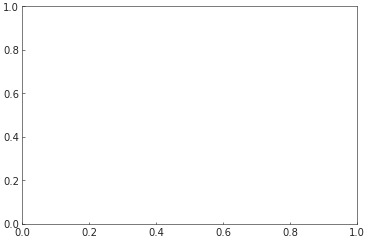

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pybinding as pb

pb.pltutils.use_style()

d = 0.2  # [nm] unit cell length
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[0, d])
lattice.add_sublattices(
    ('A', [0, 0])  # add an atom called 'A' at position [0, 0]
)
lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
    ([0, 1], 'A', 'A', t),
    ([1, 0], 'A', 'A', t)
)


def square_lattice(d, t):
    lat = pb.Lattice(a1=[d, 0], a2=[0, d])
    lat.add_sublattices(('A', [0, 0]))
    lat.add_hoppings(([0, 1], 'A', 'A', t),
                     ([1, 0], 'A', 'A', t))
    return lat

# we can quickly set a shorter unit length `d`
lattice = square_lattice(d=0.1, t=1)
lattice.plot()
plt.show()

ImportError: cannot import name 'allow_rasterization' from 'matplotlib.collections' (/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py)

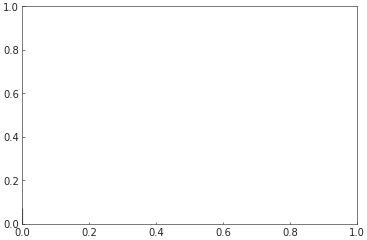

In [11]:
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

In [2]:
lattice = monolayer_graphene()
lattice.plot_brillouin_zone()

NameError: name 'monolayer_graphene' is not defined

ImportError: cannot import name 'allow_rasterization' from 'matplotlib.collections' (/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py)

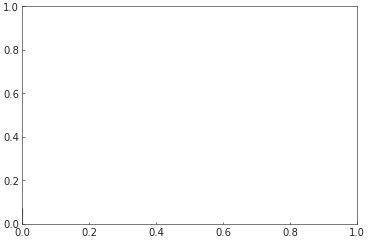

In [3]:
import pybinding as pb
import matplotlib.pyplot as plt
from math import sqrt

pb.pltutils.use_style()


def monolayer_graphene():
    """Return the lattice specification for monolayer graphene"""
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    # create a lattice with 2 primitive vectors
    lat = pb.Lattice(
        a1=[a, 0],
        a2=[a/2, a/2 * sqrt(3)]
    )

    lat.add_sublattices(
        # name and position
        ('A', [0, -a_cc/2]),
        ('B', [0,  a_cc/2])
    )

    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )

    return lat


lattice = monolayer_graphene()
lattice.plot()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pybinding/pltutils.py:79: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines[side].set_smart_bounds(True)


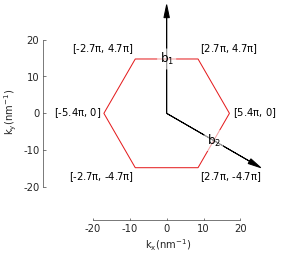

In [4]:
lattice.plot_brillouin_zone()
plt.show()
